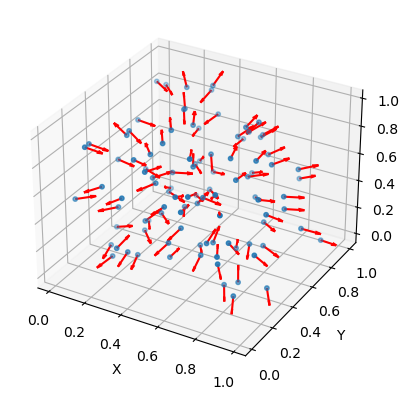

In [13]:
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 임의의 3D 데이터 생성
num_points = 100
x = np.random.rand(num_points)
y = np.random.rand(num_points)
z = np.random.rand(num_points)

# Open3D의 PointCloud 객체로 변환
pcd_ori = o3d.geometry.PointCloud()
pcd_ori.points = o3d.utility.Vector3dVector(np.column_stack((x, y, z)))

# 법선 벡터 계산
pcd_ori.estimate_normals()

# 3D 산점도 그리기
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# 포인트를 산점도로 그리기
ax.scatter(x, y, z, s=10)

# 법선 벡터를 화살표로 그리기
for i in range(len(pcd_ori.normals)):
    point = pcd_ori.points[i]
    normal = pcd_ori.normals[i]
    ax.quiver(point[0], point[1], point[2], normal[0], normal[1], normal[2], length=0.1, normalize=True, color='r')

# 축 레이블 설정
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


1.6620421298767234


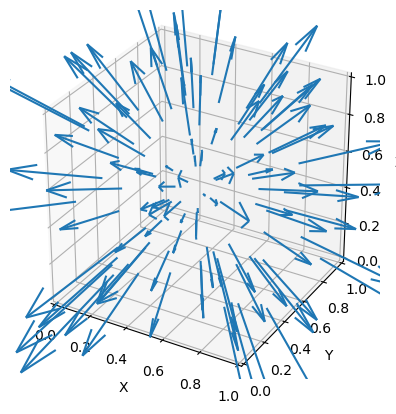

In [54]:
surface_roughness2(pcd_ori)

In [14]:
def visualize_normals(pcd):
    # 법선 벡터 계산
    pcd.estimate_normals()

    # 3D 산점도 그리기
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    # 포인트를 산점도로 그리기
    ax.scatter(x, y, z, s=10)

    # 축 범위 계산
    min_val = np.min(pcd.points)
    max_val = np.max(pcd.points)


    # 법선 벡터를 화살표로 그리기
    for i in range(len(pcd.normals)):
        point = pcd.points[i]
        normal = pcd.normals[i]
        ax.quiver(point[0], point[1], point[2], normal[0], normal[1], normal[2], length=0.1, normalize=True, color='r')

    # 축 레이블 설정
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)
    ax.set_zlim(min_val, max_val)
    plt.show()

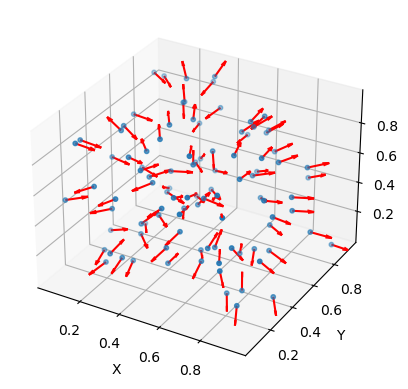

In [15]:
visualize_normals(pcd_ori)

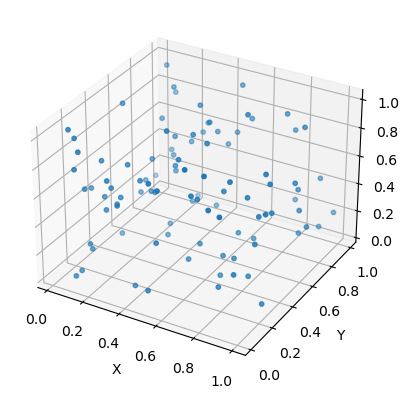

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 임의의 3D 데이터 생성
num_points = 100
x = np.random.rand(num_points)
y = np.random.rand(num_points)
z = np.random.rand(num_points)

# 3D 산점도 그리기
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, s=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


In [17]:
# Moment of Inertia 계산
cov = np.cov(np.asarray(pcd.points).T)
evals, evecs = np.linalg.eigh(cov)
radii = np.sqrt(evals)

NameError: name 'pcd' is not defined

In [ ]:
roughness_list = []
# Surface Roughness 계산
center = np.asarray(pcd.get_center())
roughness = 0
for i in range(len(pcd.points)):
    point = np.asarray(pcd.points[i])
    vec = point - center
    dist = np.linalg.norm(np.dot(vec, evecs) / radii)
    roughness += dist
roughness /= len(pcd.points)
roughness_list.append(roughness)

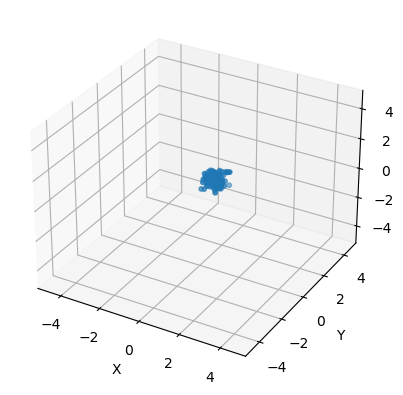

In [ ]:
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 데이터 생성
num_points = 100
x = np.random.rand(num_points)
y = np.random.rand(num_points)
z = np.random.rand(num_points)

# Open3D의 PointCloud 객체로 변환
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(np.column_stack((x, y, z)))

# Moment of Inertia 계산
cov = np.cov(np.asarray(pcd.points).T)
evals, evecs = np.linalg.eigh(cov)
radii = np.sqrt(evals)

# Surface Roughness 계산
center = np.asarray(pcd.get_center())
roughness = 0
for i in range(len(pcd.points)):
    point = np.asarray(pcd.points[i])
    vec = point - center
    dist = np.linalg.norm(np.dot(vec, evecs) / radii)
    roughness += dist
roughness /= len(pcd.points)

# 3D 산점도 그리기
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# 포인트를 산점도로 그리기
ax.scatter(x, y, z, s=10)

# Moment of Inertia를 화살표로 그리기
for i in range(3):
    length = np.sqrt(evals[i])
    direction = evecs[:, i]
    ax.quiver(center[0], center[1], center[2], direction[0]*length, direction[1]*length, direction[2]*length, color='r')

# # Surface Roughness 값 출력
# ax.text2D(0.05, 0.95, f"Surface Roughness: {roughness:.4f}", transform=ax.transAxes)

minmax = 5

# 축 레이블 설정
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-minmax, minmax)
ax.set_ylim(-minmax, minmax)
ax.set_zlim(-minmax, minmax)
plt.show()


In [ ]:
def surface_roughness(pcd):
    # Moment of Inertia 계산
    cov = np.cov(np.asarray(pcd.points).T)
    evals, evecs = np.linalg.eigh(cov)
    radii = np.sqrt(evals)

    # Surface Roughness 계산
    center = np.asarray(pcd.get_center())
    roughness = 0
    for i in range(len(pcd.points)):
        point = np.asarray(pcd.points[i])
        vec = point - center
        dist = np.linalg.norm(np.dot(vec, evecs) / radii)
        roughness += dist
    roughness /= len(pcd.points)
    
    # 3D 산점도 그리기
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    # 포인트를 산점도로 그리기
    ax.scatter(x, y, z, s=10)
    max_val = np.max(pcd)

    quiver_scale = 0.5

    # Moment of Inertia를 화살표로 그리기
    for i in range(3):
        length = np.sqrt(evals[i])
        direction = evecs[:, i]


        # quiver() 함수 인자로 전달할 변수를 각각 리스트로 묶어주기
        X = [point[0]]
        Y = [point[1]]
        Z = [point[2]]
        U = [vec[0]]
        V = [vec[1]]
        W = [vec[2]]

        ax.quiver(X, Y, Z, U, V, W, length=dist*quiver_scale, arrow_length_ratio=0.3)


    # Surface Roughness 값 출력
    ax.text2D(0.05, 0.95, f"Surface Roughness: {roughness:.4f}", transform=ax.transAxes)

    # 축 레이블 설정
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    minmax = 5
    ax.set_xlim(-minmax, minmax)
    ax.set_ylim(-minmax, minmax)
    ax.set_zlim(-minmax, minmax)
    plt.show()
    return roughness

In [53]:
def surface_roughness2(pcd):
    # Normal 벡터 추정
    pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.03, max_nn=30))

    # Moment of Inertia 계산
    cov = np.cov(np.asarray(pcd.points).T)
    evals, evecs = np.linalg.eigh(cov)
    radii = np.sqrt(evals)

    # Surface Roughness 계산
    center = np.asarray(pcd.get_center())
    roughness = 0

    quiver_scale = 0.5
    
    for i in range(len(pcd.points)):
        point = np.asarray(pcd.points[i])
        vec = point - center
        dist = np.linalg.norm(np.dot(vec, evecs) / radii)
        roughness += dist
        
    roughness /= len(pcd.points)
    print(roughness)

        # 시각화 설정
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_aspect('equal')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # 벡터 시각화
    quiver_scale = 0.5  # 화살표 크기를 조절할 수 있는 상수
    for i in range(len(pcd.points)):
        point = np.asarray(pcd.points[i])
        vec = point - center
        dist = np.linalg.norm(np.dot(vec, evecs) / radii)

        # quiver() 함수 인자로 전달할 변수를 각각 리스트로 묶어주기
        X = [point[0]]
        Y = [point[1]]
        Z = [point[2]]
        U = [vec[0]]
        V = [vec[1]]
        W = [vec[2]]

        ax.quiver(X, Y, Z, U, V, W, length=dist*quiver_scale, arrow_length_ratio=0.3)

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_zlim(0, 1)
    plt.show()



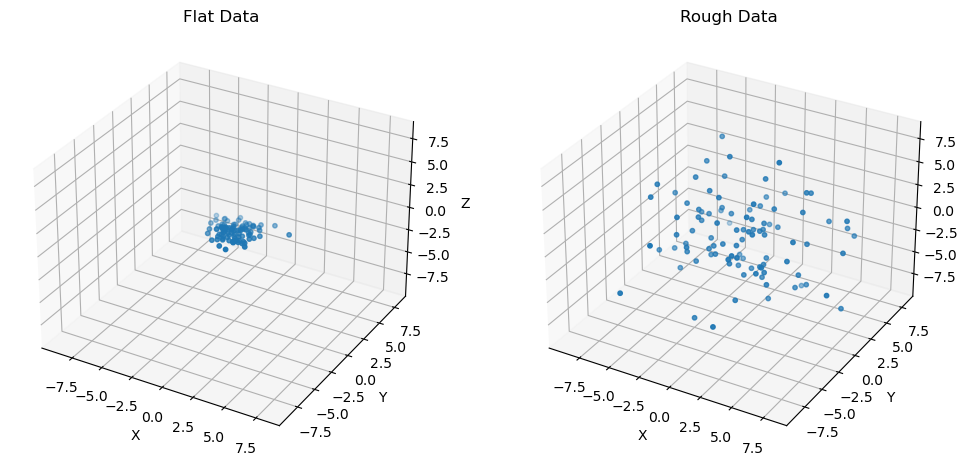

In [38]:
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 평균은 0으로, 각 좌표 축에 대한 표준편차를 조정하여 데이터 생성
mean = [0, 0, 0]
flat_cov = [[1, 0, 0], [0, 1, 0], [0, 0, 0.001]]
rough_cov = [[10, 0, 0], [0, 10, 0], [0, 0, 10]]

num_points = 100

# 평평한 데이터 생성
flat_points = np.random.multivariate_normal(mean, flat_cov, num_points)

# 울퉁불퉁한 데이터 생성
rough_points = np.random.multivariate_normal(mean, rough_cov, num_points)

# Open3D의 PointCloud 객체로 변환
flat_pcd = o3d.geometry.PointCloud()
flat_pcd.points = o3d.utility.Vector3dVector(flat_points)

rough_pcd = o3d.geometry.PointCloud()
rough_pcd.points = o3d.utility.Vector3dVector(rough_points)

# 축 범위 계산
min_val = min(np.min(flat_points), np.min(rough_points))
max_val = max(np.max(flat_points), np.max(rough_points))

# 3D 산점도 그리기
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(flat_points[:,0], flat_points[:,1], flat_points[:,2], s=10)
ax1.set_title('Flat Data')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_xlim(min_val, max_val)
ax1.set_ylim(min_val, max_val)
ax1.set_zlim(min_val, max_val)

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(rough_points[:,0], rough_points[:,1], rough_points[:,2], s=10)
ax2.set_title('Rough Data')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_xlim(min_val, max_val)
ax2.set_ylim(min_val, max_val)
ax2.set_zlim(min_val, max_val)

plt.show()

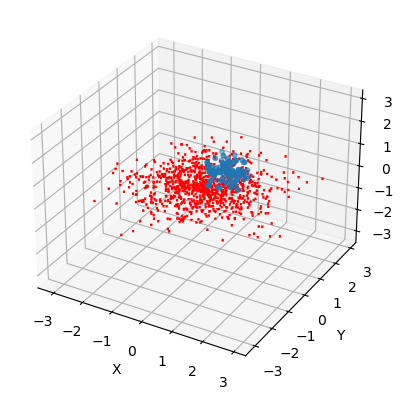

In [18]:
visualize_normals(flat_pcd)

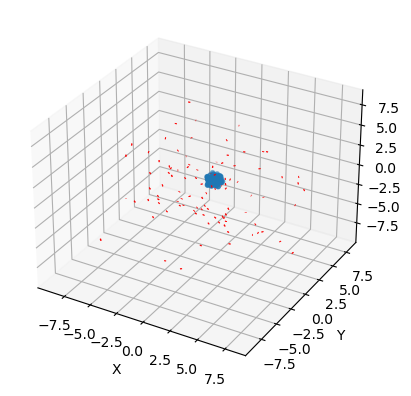

In [51]:
visualize_normals(rough_pcd)

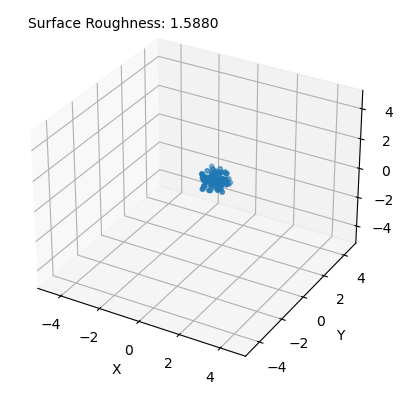

In [27]:
flat_value = surface_roughness(flat_pcd)

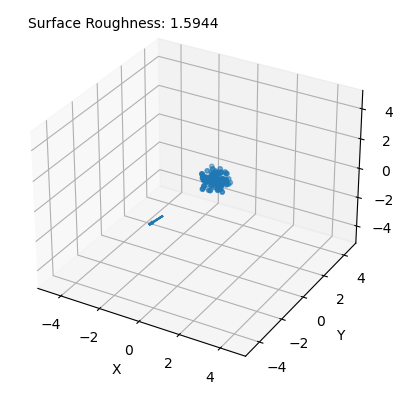

In [30]:
rough_value = surface_roughness(rough_pcd)

1.5612004245977027


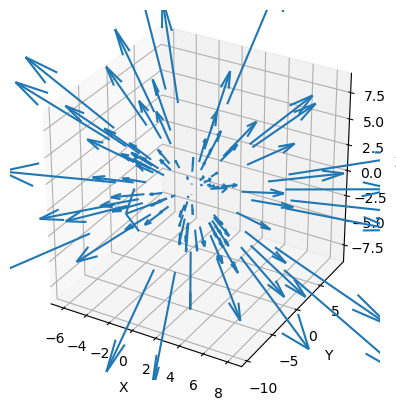

In [50]:
rough_value2 = surface_roughness2(rough_pcd)

1.5822455243449367


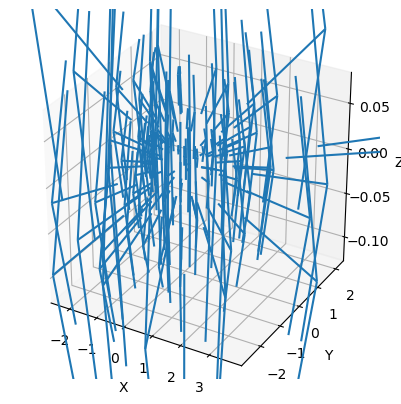

In [40]:
flat_value2 = surface_roughness2(flat_pcd)

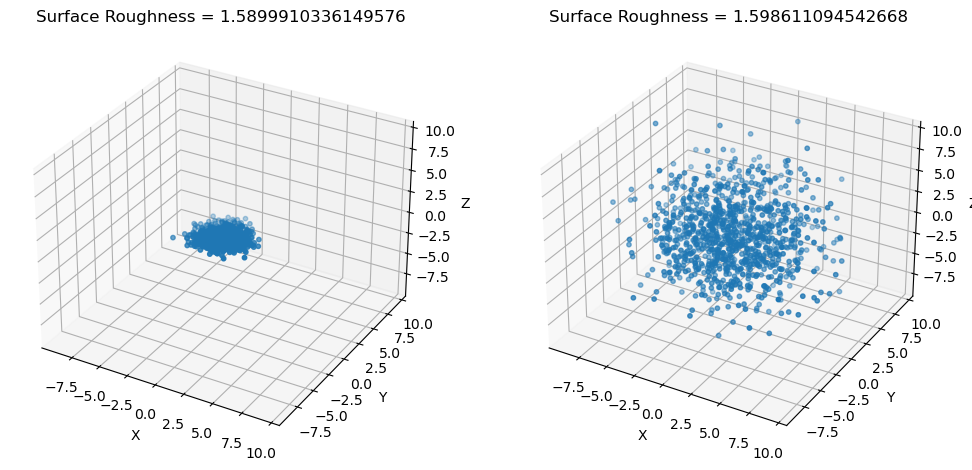

In [ ]:
# 3D 산점도 그리기
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(flat_points[:,0], flat_points[:,1], flat_points[:,2], s=10)
ax1.set_title('Surface Roughness = 1.5899910336149576')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_xlim(min_val, max_val)
ax1.set_ylim(min_val, max_val)
ax1.set_zlim(min_val, max_val)

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(rough_points[:,0], rough_points[:,1], rough_points[:,2], s=10)
ax2.set_title('Surface Roughness = 1.598611094542668')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_xlim(min_val, max_val)
ax2.set_ylim(min_val, max_val)
ax2.set_zlim(min_val, max_val)

plt.show()